### Import libraries

In [1]:
# Let`s import all packages that we may need:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM,GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


# Data processing


In [2]:
import pandas as pd
nov = pd.read_csv('NovAll.csv')
apr =pd.read_csv('AprilAll.csv')
nov_apr =pd.read_csv('April_Nov.csv')

In [3]:
nov['Time1'] = nov['Time'].str.replace('_', '')
apr['Time1'] = apr['Time'].str.replace('_', '')
nov_apr['Time1'] = nov_apr['Time'].str.replace('_', '')

In [4]:
nov['time_corrected']= pd.to_datetime(nov['Time1'], format='%Y%m%d%H', errors='coerce')
apr['time_corrected']= pd.to_datetime(apr['Time1'], format='%Y%m%d%H', errors='coerce')
nov_apr['time_corrected']= pd.to_datetime(nov_apr['Time1'], format='%Y%m%d%H', errors='coerce')

In [5]:
nov.set_index('time_corrected', inplace=True)
apr.set_index('time_corrected', inplace=True)
nov_apr.set_index('time_corrected', inplace=True)

In [6]:
nov = nov.drop(['Time','Time1'],axis=1)
apr = apr.drop(['Time','Time1'],axis=1)
nov_apr = nov_apr.drop(['Time','Time1'],axis=1)

In [7]:
print(nov.isnull().sum())
print(apr.isnull().sum())
print(nov_apr.isnull().sum())

traffic information    0
RP                     0
dtype: int64
traffic information    0
RP                     0
dtype: int64
traffic information    0
RP                     0
dtype: int64


In [8]:
nov.columns = nov.columns.str.strip()
apr.columns = apr.columns.str.strip()
nov_apr.columns = nov_apr.columns.str.strip()

# Part B

# SVM, DNN, RBF

## Univariate SVM

In [9]:
nov_apr.head()

,traffic information,RP
time_corrected,,
2015-04-01 00:00:00,78.6,91.7
2015-04-01 01:00:00,80.0,93.7
2015-04-01 02:00:00,80.1,91.4
2015-04-01 03:00:00,80.0,92.7
2015-04-01 04:00:00,79.0,93.5


In [10]:
nov_apr_1 = nov_apr.copy()

In [11]:
nov_apr_1 = nov_apr_1.reset_index()
nov_apr_1['hour'] = nov_apr_1['time_corrected'].dt.hour
nov_apr_1['WEEKDAY'] = (((nov_apr_1.time_corrected).dt.dayofweek) // 5 == 1).astype(float)

In [12]:
nov_apr_uni = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_uni[:1200]
test =nov_apr_uni[1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 


(1200, 2) (1200,) (188, 2) (188,)


In [13]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [14]:
predict = regressor.predict(test_X)

In [15]:
# for storing all models MAE and MSE values for final graph
loss_all_model = pd.DataFrame(columns=['model', 'MSE', 'MAE'])
model_index = 0

In [16]:
mae_svm_nov_apr_uni = mean_absolute_error(test_y, predict)
print (mae_svm_nov_apr_uni)

1.5594998767033987


In [17]:
mse_svm_nov_apr_uni = mean_squared_error(test_y, predict)

In [18]:
mse_svm_nov_apr_uni

4.221012384873484

In [19]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'svm_nov_apr_uni'
loss_all_model.loc[model_index, 'MAE'] = mae_svm_nov_apr_uni
loss_all_model.loc[model_index, 'MSE'] = mse_svm_nov_apr_uni
model_index += 1

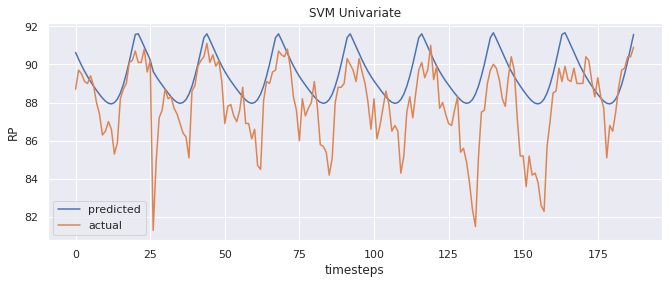

In [20]:
sns.set(rc={'figure.figsize':(11,4)})
plt.plot(predict)
plt.plot(test_y.values)
plt.title('SVM Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

# Multivariate SVM

In [21]:
nov_apr_multi = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_multi [:1200]
test =nov_apr_multi [1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['traffic information','hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['traffic information','hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 3) (1200,) (188, 3) (188,)


In [22]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
predict = regressor.predict(test_X)

In [24]:
mae_svm_nov_apr_multi=mean_absolute_error(test_y, predict)

In [25]:
mae_svm_nov_apr_multi

1.6452997544508714

In [26]:
mse_svm_nov_apr_multi = mean_squared_error(test_y, predict)

In [27]:
mse_svm_nov_apr_multi

4.8761760394791684

In [28]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'svm_nov_apr_multi'
loss_all_model.loc[model_index, 'MAE'] = mae_svm_nov_apr_multi
loss_all_model.loc[model_index, 'MSE'] = mse_svm_nov_apr_multi
model_index += 1

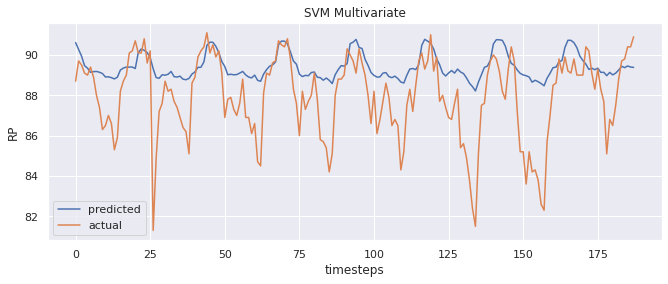

In [29]:
plt.plot(predict)
plt.plot(test_y.values)
plt.title('SVM Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

# DNN

## Univariate

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [31]:
nov_apr_uni = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_uni[:1200]
test =nov_apr_uni[1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 2) (1200,) (188, 2) (188,)


1. Define a sequential model
2. Add some dense layers
3. Use ‘relu’ as the activation function for the hidden layers
4. Use a ‘normal’ initializer as the kernal_intializer
(Initializers define the way to set the initial random weights of Keras layers.)
5. We will use mean_absolute_error as a loss function
6. Define the output layer with only one node
7. Use ‘linear ’as the activation function for the output layer



Creating DNN architechure with 1 input layer with 128 neurorns for provinding the train data and 3 hidden layers.
As it is regression there is only 1 neuron at the output. The optimization is done using ADAM optimizer with mean absolute error as loss function

In [32]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


Define a checkpoint callback :

In [33]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

 Train the model :

In [34]:
history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 960 samples, validate on 240 samples
Epoch 1/100
960/960 [==============================] - 4s 4ms/step - loss: 5366.8454 - mean_absolute_error: 68.6366 - val_loss: 2247.1887 - val_mean_absolute_error: 41.2164

Epoch 00001: val_loss improved from inf to 2247.18872, saving model to Weights-001--2247.18872.hdf5
Epoch 2/100
960/960 [==============================] - 0s 468us/step - loss: 1864.3132 - mean_absolute_error: 35.9449 - val_loss: 1450.9361 - val_mean_absolute_error: 31.6338

Epoch 00002: val_loss improved from 2247.18872 to 1450.93610, saving model to Weights-002--1450.93610.hdf5
Epoch 3/100
960/960 [==============================] - 0s 105us/step - loss: 1249.8371 - mean_absolute_error: 29.2058 - val_loss: 727.3181 - val_mean_absolute_error: 22.6928

Epoch 00003: val_loss improved from 1450.93610 to 727.31815, saving model to Weights-003--727.31815.hdf5
Epoch 4/100
960/960 [==============================] - 0s 242us/step - loss: 432.0952 - mean_absolute_error: 17.3854 

960/960 [==============================] - 0s 99us/step - loss: 3.1974 - mean_absolute_error: 1.3958 - val_loss: 9.4396 - val_mean_absolute_error: 2.7031

Epoch 00072: val_loss did not improve from 2.43003
Epoch 73/100
960/960 [==============================] - 0s 105us/step - loss: 6.0579 - mean_absolute_error: 1.9723 - val_loss: 5.1985 - val_mean_absolute_error: 1.8726

Epoch 00073: val_loss did not improve from 2.43003
Epoch 74/100
960/960 [==============================] - 0s 95us/step - loss: 2.7978 - mean_absolute_error: 1.3141 - val_loss: 8.9327 - val_mean_absolute_error: 2.5470

Epoch 00074: val_loss did not improve from 2.43003
Epoch 75/100
960/960 [==============================] - 0s 132us/step - loss: 2.8679 - mean_absolute_error: 1.3080 - val_loss: 3.5199 - val_mean_absolute_error: 1.3911

Epoch 00075: val_loss did not improve from 2.43003
Epoch 76/100
960/960 [==============================] - 0s 116us/step - loss: 2.6568 - mean_absolute_error: 1.2646 - val_loss: 15.2784 

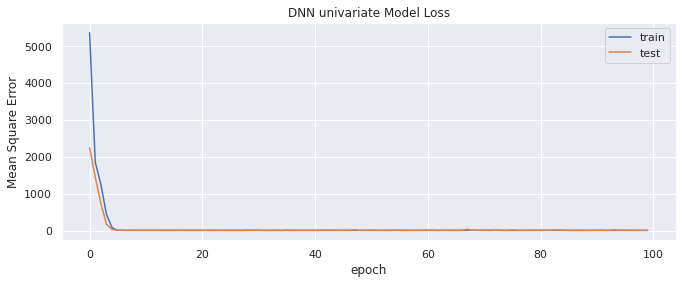

In [35]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN univariate Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

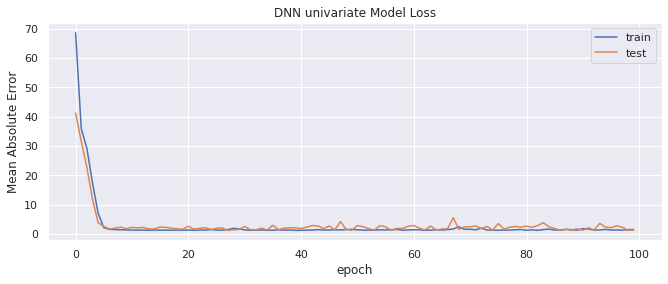

In [36]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('DNN univariate Model Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [37]:
# Load wights file of the best model :/content/Weights-049--0.01040.hdf5
wights_file = 'Weights-065--2.32159.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

In [38]:
predictions = NN_model.predict(test_X)

In [39]:
# MAE and MSE is not multiplied with 100 because it is not percentage
print('Mean Absolute Error:', mean_absolute_error(test_y, predictions.ravel()))

Mean Absolute Error: 1.2162724352897485


In [40]:
DNN_univariate_mae =  mean_absolute_error(test_y, predictions.ravel())
DNN_univariate_mse =  mean_squared_error(test_y, predictions.ravel())

In [41]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'DNN_univariate'
loss_all_model.loc[model_index, 'MAE'] = DNN_univariate_mae
loss_all_model.loc[model_index, 'MSE'] = DNN_univariate_mse
model_index += 1

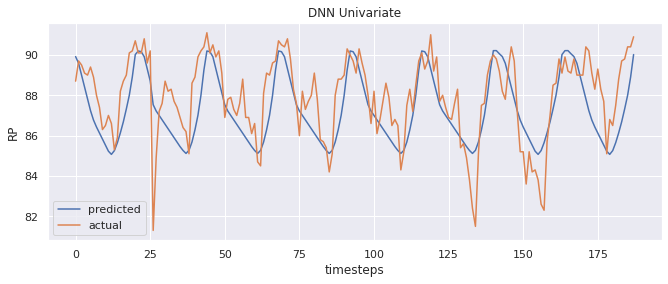

In [42]:
plt.plot(predictions)
plt.plot(test_y.values)
plt.title('DNN Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

## Multivariate

In [43]:
nov_apr_multi = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_multi [:1200]
test =nov_apr_multi [1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['traffic information','hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['traffic information','hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 3) (1200,) (188, 3) (188,)


In [44]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [45]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weightsmulti-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [46]:
history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 960 samples, validate on 240 samples
Epoch 1/100
960/960 [==============================] - 0s 449us/step - loss: 3149.0812 - mean_absolute_error: 46.6983 - val_loss: 339.2525 - val_mean_absolute_error: 18.2468

Epoch 00001: val_loss improved from inf to 339.25253, saving model to Weightsmulti-001--339.25253.hdf5
Epoch 2/100
960/960 [==============================] - 0s 112us/step - loss: 104.8549 - mean_absolute_error: 8.1280 - val_loss: 22.3748 - val_mean_absolute_error: 4.1017

Epoch 00002: val_loss improved from 339.25253 to 22.37477, saving model to Weightsmulti-002--22.37477.hdf5
Epoch 3/100
960/960 [==============================] - 0s 103us/step - loss: 9.0294 - mean_absolute_error: 2.3942 - val_loss: 4.5652 - val_mean_absolute_error: 1.7757

Epoch 00003: val_loss improved from 22.37477 to 4.56522, saving model to Weightsmulti-003--4.56522.hdf5
Epoch 4/100
960/960 [==============================] - 0s 112us/step - loss: 3.6437 - mean_absolute_error: 1.5100 - val_loss: 

960/960 [==============================] - 0s 129us/step - loss: 2.3445 - mean_absolute_error: 1.2005 - val_loss: 4.8449 - val_mean_absolute_error: 1.8238

Epoch 00037: val_loss did not improve from 3.64703
Epoch 38/100
960/960 [==============================] - 0s 140us/step - loss: 2.3978 - mean_absolute_error: 1.2147 - val_loss: 7.1105 - val_mean_absolute_error: 2.3187

Epoch 00038: val_loss did not improve from 3.64703
Epoch 39/100
960/960 [==============================] - 0s 130us/step - loss: 2.7922 - mean_absolute_error: 1.3088 - val_loss: 5.8293 - val_mean_absolute_error: 2.0517

Epoch 00039: val_loss did not improve from 3.64703
Epoch 40/100
960/960 [==============================] - 0s 129us/step - loss: 2.5897 - mean_absolute_error: 1.2677 - val_loss: 5.2961 - val_mean_absolute_error: 1.9272

Epoch 00040: val_loss did not improve from 3.64703
Epoch 41/100
960/960 [==============================] - 0s 114us/step - loss: 2.3236 - mean_absolute_error: 1.1933 - val_loss: 7.2239


Epoch 00073: val_loss did not improve from 1.95932
Epoch 74/100
960/960 [==============================] - 0s 108us/step - loss: 3.4452 - mean_absolute_error: 1.4688 - val_loss: 7.8538 - val_mean_absolute_error: 2.4583

Epoch 00074: val_loss did not improve from 1.95932
Epoch 75/100
960/960 [==============================] - 0s 207us/step - loss: 2.5824 - mean_absolute_error: 1.2553 - val_loss: 5.8076 - val_mean_absolute_error: 2.0411

Epoch 00075: val_loss did not improve from 1.95932
Epoch 76/100
960/960 [==============================] - 0s 163us/step - loss: 2.5100 - mean_absolute_error: 1.2443 - val_loss: 12.7293 - val_mean_absolute_error: 3.3020

Epoch 00076: val_loss did not improve from 1.95932
Epoch 77/100
960/960 [==============================] - 0s 160us/step - loss: 2.4608 - mean_absolute_error: 1.2304 - val_loss: 3.3347 - val_mean_absolute_error: 1.4222

Epoch 00077: val_loss did not improve from 1.95932
Epoch 78/100
960/960 [==============================] - 0s 153us/st

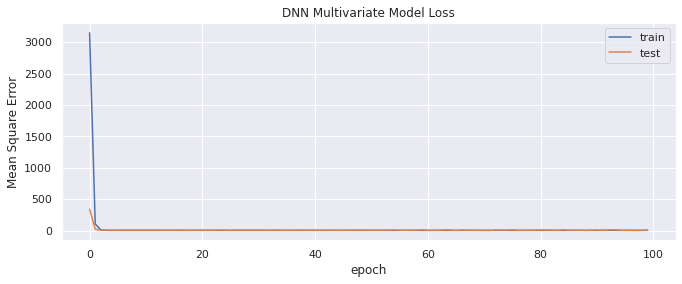

In [47]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Multivariate Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

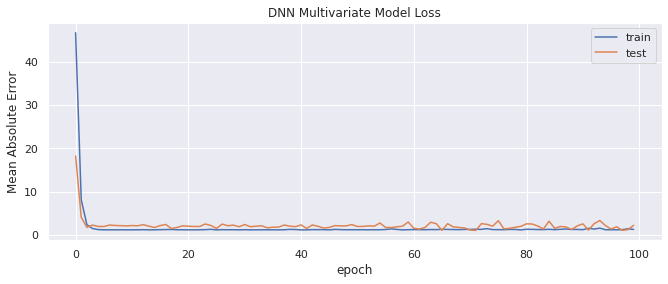

In [48]:
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('DNN Multivariate Model Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [49]:
# Load wights file of the best model :/content//content/Weightsmulti-038--0.00989.hdf5
wights_file = 'Weightsmulti-080--2.35055.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

In [50]:
predictions = NN_model.predict(test_X)

In [51]:
from sklearn import metrics
print('Mean Absolute Error:', mean_absolute_error(test_y, predictions.ravel())) 

Mean Absolute Error: 1.0720789970235625


In [52]:
DNN_multivariate_mae =  mean_absolute_error(test_y, predictions.ravel())
DNN_multivariate_mse =  mean_squared_error(test_y, predictions.ravel())

In [53]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'DNN_multivariate'
loss_all_model.loc[model_index, 'MAE'] = DNN_multivariate_mae
loss_all_model.loc[model_index, 'MSE'] = DNN_multivariate_mse
model_index += 1

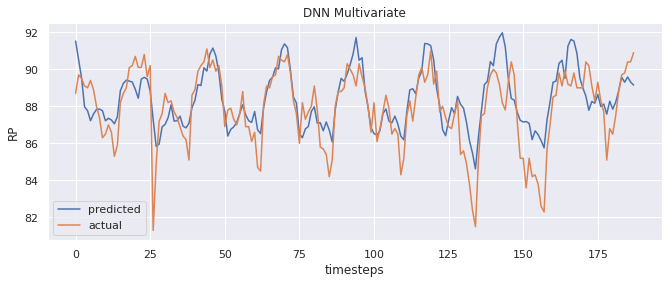

In [54]:
plt.plot(predictions)
plt.plot(test_y.values)
plt.title('DNN Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

# GRU


GRU is a type of RNN.
GRU’s were created as the solution to short-term memory.
They have internal mechanisms called gates that can regulate the flow of information.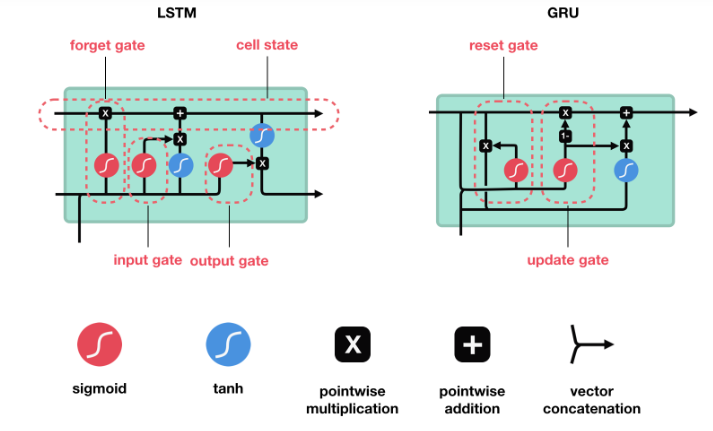

These gates can learn which data in a sequence is important to keep or throw away. By doing that, it can pass relevant information down the long chain of sequences to make predictions. Almost all state of the art results based on recurrent neural networks are achieved with these two networks. LSTM’s and GRU’s can be found in speech recognition, speech synthesis, and text generation. You can even use them to generate captions for videos.

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

## Univariate

In [55]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [56]:
nov_apr.head()

,traffic information,RP
time_corrected,,
2015-04-01 00:00:00,78.6,91.7
2015-04-01 01:00:00,80.0,93.7
2015-04-01 02:00:00,80.1,91.4
2015-04-01 03:00:00,80.0,92.7
2015-04-01 04:00:00,79.0,93.5


In [57]:
## resampling of data over hour for Nov
nov_apr_resample = nov_apr.resample('h').mean() 
nov_apr_resample.shape

(4296, 2)

In [58]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = nov_apr_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed_nov_apr = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
print(reframed_nov_apr.head())

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.613333   0.728571  0.653333  0.728571
2   0.653333   0.728571  0.653333  0.714286
3   0.653333   0.714286  0.600000  0.628571
4   0.600000   0.628571  0.560000  0.685714
5   0.560000   0.685714  0.373333  0.557143


In [59]:
reframed_nov_apr_uni = reframed_nov_apr.drop(['var1(t-1)','var1(t)'],axis=1)

In [60]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [61]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

print ('model compiled')

model compiled


In [62]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Train on 1200 samples, validate on 182 samples
Epoch 1/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.4238 - mean_absolute_error: 0.6322 - val_loss: 0.4669 - val_mean_absolute_error: 0.6735
Epoch 2/20
1200/1200 [==============================] - 0s 23us/step - loss: 0.3580 - mean_absolute_error: 0.5794 - val_loss: 0.3857 - val_mean_absolute_error: 0.6110
Epoch 3/20
1200/1200 [==============================] - 0s 23us/step - loss: 0.2909 - mean_absolute_error: 0.5204 - val_loss: 0.3071 - val_mean_absolute_error: 0.5437
Epoch 4/20
1200/1200 [==============================] - 0s 27us/step - loss: 0.2277 - mean_absolute_error: 0.4576 - val_loss: 0.2327 - val_mean_absolute_error: 0.4714
Epoch 5/20
1200/1200 [==============================] - 0s 30us/step - loss: 0.1680 - mean_absolute_error: 0.3893 - val_loss: 0.1642 - val_mean_absolute_error: 0.3938
Epoch 6/20
1200/1200 [==============================] - 0s 22us/step - loss: 0.1151 - mean_absolute_error: 0.3169 - val

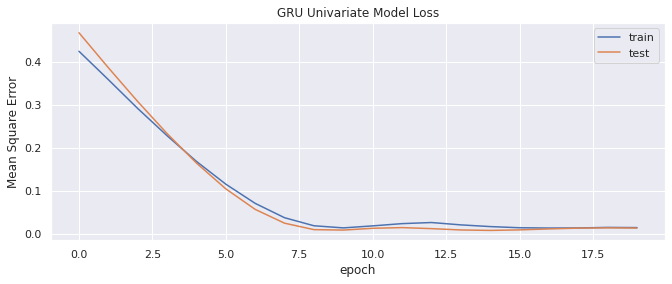

In [63]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Univariate Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

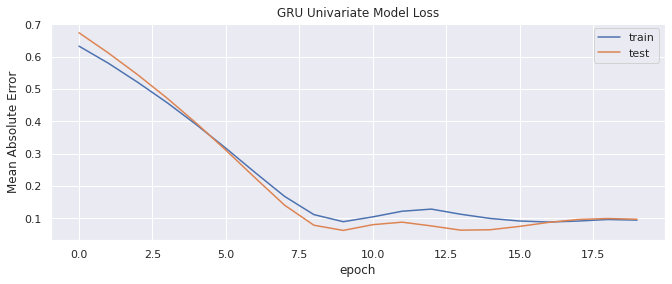

In [64]:
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('GRU Univariate Model Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [65]:
predictions = model.predict(test_X)
GRU_univariate_mae = mean_absolute_error(test_y, predictions)
GRU_univariate_mse = mean_squared_error(test_y, predictions)

In [66]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'GRU_univariate'
loss_all_model.loc[model_index, 'MAE'] = GRU_univariate_mae
loss_all_model.loc[model_index, 'MSE'] = GRU_univariate_mse
model_index += 1

In [67]:
# This script is not making any sense
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_univariate = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.5f' % mae_GRU_univariate)

Test MAE: 0.72997


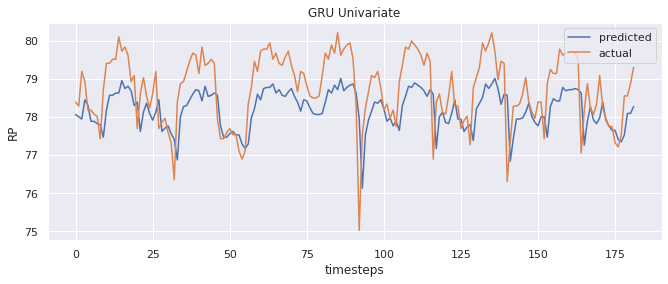

In [68]:
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('GRU Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [69]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [70]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],2)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

print ('model compiled')

model compiled


In [71]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Train on 1200 samples, validate on 182 samples
Epoch 1/20
1200/1200 [==============================] - 1s 1ms/step - loss: 0.3804 - mean_absolute_error: 0.5985 - val_loss: 0.4060 - val_mean_absolute_error: 0.6279
Epoch 2/20
1200/1200 [==============================] - 0s 21us/step - loss: 0.3067 - mean_absolute_error: 0.5356 - val_loss: 0.3138 - val_mean_absolute_error: 0.5509
Epoch 3/20
1200/1200 [==============================] - 0s 23us/step - loss: 0.2316 - mean_absolute_error: 0.4627 - val_loss: 0.2257 - val_mean_absolute_error: 0.4656
Epoch 4/20
1200/1200 [==============================] - 0s 20us/step - loss: 0.1611 - mean_absolute_error: 0.3823 - val_loss: 0.1464 - val_mean_absolute_error: 0.3732
Epoch 5/20
1200/1200 [==============================] - 0s 27us/step - loss: 0.1006 - mean_absolute_error: 0.2958 - val_loss: 0.0807 - val_mean_absolute_error: 0.2744
Epoch 6/20
1200/1200 [==============================] - 0s 23us/step - loss: 0.0516 - mean_absolute_error: 0.2027 - val

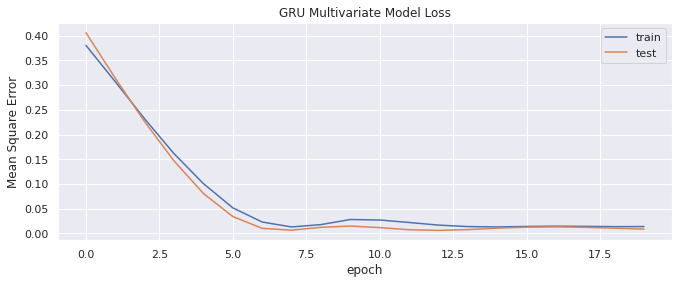

In [72]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Multivariate Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

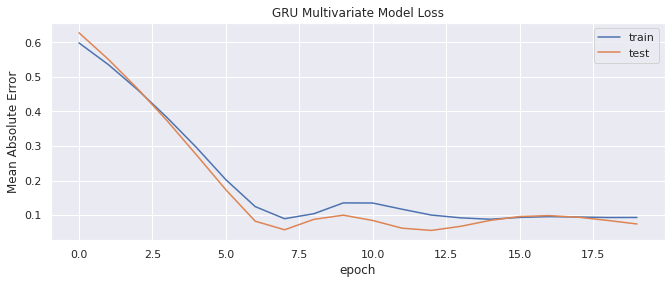

In [73]:
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('GRU Multivariate Model Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [74]:
predictions = model.predict(test_X)
GRU_multivariate_mae = mean_absolute_error(test_y, predictions)
GRU_multivariate_mse = mean_squared_error(test_y, predictions)

In [75]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'GRU_multivariate'
loss_all_model.loc[model_index, 'MAE'] = GRU_multivariate_mae
loss_all_model.loc[model_index, 'MSE'] = GRU_multivariate_mse
model_index += 1

In [76]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_multivariate = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.5f' % mae_GRU_multivariate)

Test MAE: 0.55772


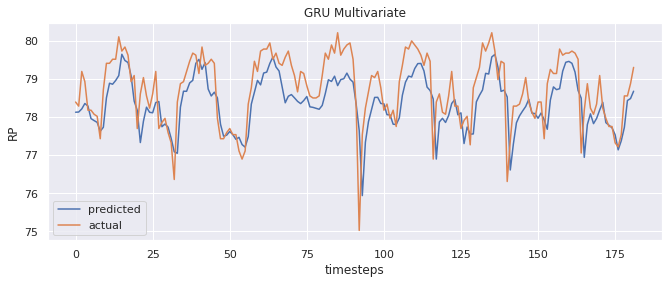

In [77]:
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('GRU Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

# RBFN


## Univariate

In [78]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [79]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [80]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

In [81]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1200 samples, validate on 182 samples
Epoch 1/20
 - 1s - loss: 0.9072 - mean_absolute_error: 0.9447 - val_loss: 0.8415 - val_mean_absolute_error: 0.9111
Epoch 2/20
 - 0s - loss: 0.5911 - mean_absolute_error: 0.7582 - val_loss: 0.5546 - val_mean_absolute_error: 0.7362
Epoch 3/20
 - 0s - loss: 0.3630 - mean_absolute_error: 0.5875 - val_loss: 0.3533 - val_mean_absolute_error: 0.5827
Epoch 4/20
 - 0s - loss: 0.2140 - mean_absolute_error: 0.4414 - val_loss: 0.2209 - val_mean_absolute_error: 0.4545
Epoch 5/20
 - 0s - loss: 0.1239 - mean_absolute_error: 0.3242 - val_loss: 0.1383 - val_mean_absolute_error: 0.3518
Epoch 6/20
 - 0s - loss: 0.0735 - mean_absolute_error: 0.2393 - val_loss: 0.0891 - val_mean_absolute_error: 0.2735
Epoch 7/20
 - 0s - loss: 0.0478 - mean_absolute_error: 0.1851 - val_loss: 0.0610 - val_mean_absolute_error: 0.2174
Epoch 8/20
 - 0s - loss: 0.0359 - mean_absolute_error: 0.1572 - val_loss: 0.0453 - val_mean_absolute_error: 0.1828
Epoch 9/20
 - 0s - loss: 0.0310 -

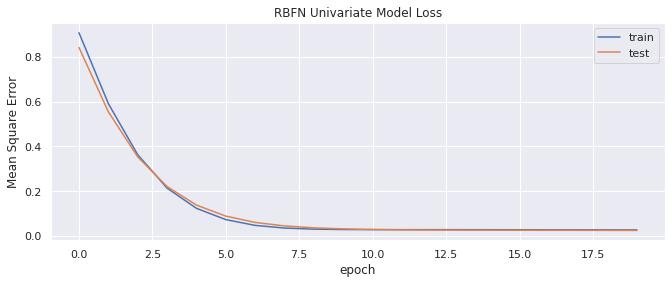

In [82]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Univariate Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

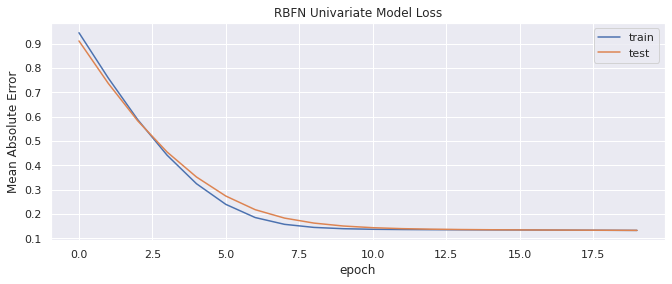

In [83]:
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('RBFN Univariate Model Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [84]:
predictions = model.predict(test_X)
RBFN_univariate_mae = mean_absolute_error(test_y, predictions)
RBFN_univariate_mse = mean_squared_error(test_y, predictions)

In [85]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'RBFN_univariate'
loss_all_model.loc[model_index, 'MAE'] = RBFN_univariate_mae
loss_all_model.loc[model_index, 'MSE'] = RBFN_univariate_mse
model_index += 1

In [86]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [87]:
# calculate RMSE
from sklearn.metrics import mean_absolute_error
mae_RBFN_univariate = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.5f' % mae_RBFN_univariate)

Test MAE: 0.99294


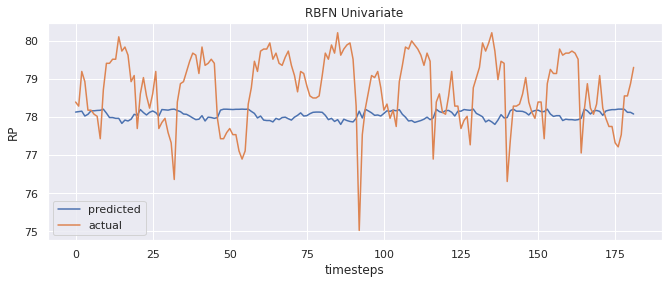

In [88]:

plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('RBFN Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

## Multivariate

In [89]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [90]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

In [91]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1200 samples, validate on 182 samples
Epoch 1/20
 - 1s - loss: 0.0633 - mean_absolute_error: 0.2089 - val_loss: 0.0608 - val_mean_absolute_error: 0.2031
Epoch 2/20
 - 0s - loss: 0.0571 - mean_absolute_error: 0.1950 - val_loss: 0.0495 - val_mean_absolute_error: 0.1831
Epoch 3/20
 - 0s - loss: 0.0583 - mean_absolute_error: 0.1959 - val_loss: 0.0499 - val_mean_absolute_error: 0.1837
Epoch 4/20
 - 0s - loss: 0.0555 - mean_absolute_error: 0.1919 - val_loss: 0.0496 - val_mean_absolute_error: 0.1830
Epoch 5/20
 - 0s - loss: 0.0529 - mean_absolute_error: 0.1874 - val_loss: 0.0475 - val_mean_absolute_error: 0.1792
Epoch 6/20
 - 0s - loss: 0.0509 - mean_absolute_error: 0.1836 - val_loss: 0.0455 - val_mean_absolute_error: 0.1753
Epoch 7/20
 - 0s - loss: 0.0490 - mean_absolute_error: 0.1800 - val_loss: 0.0438 - val_mean_absolute_error: 0.1718
Epoch 8/20
 - 0s - loss: 0.0472 - mean_absolute_error: 0.1764 - val_loss: 0.0422 - val_mean_absolute_error: 0.1686
Epoch 9/20
 - 0s - loss: 0.0454 -

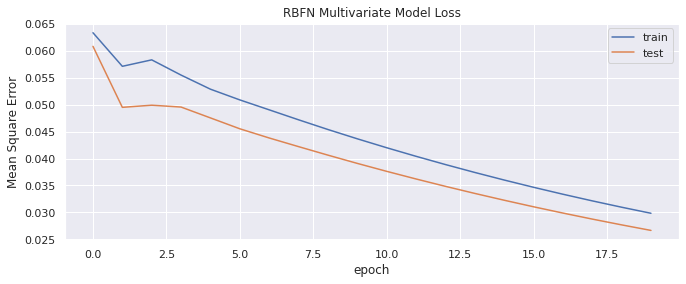

In [92]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Multivariate Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

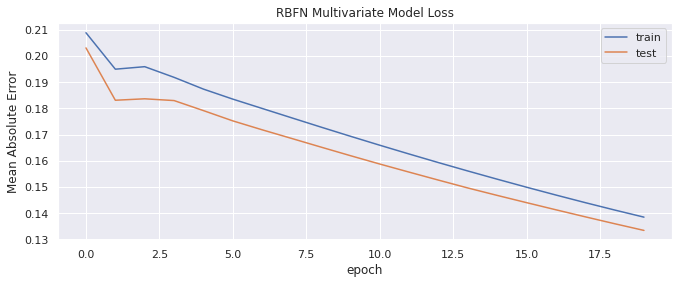

In [93]:
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('RBFN Multivariate Model Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [94]:
predictions = model.predict(test_X)
RBFN_multivariate_mae = mean_absolute_error(test_y, predictions)
RBFN_multivariate_mse = mean_squared_error(test_y, predictions)

In [95]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'RBFN_multivariate'
loss_all_model.loc[model_index, 'MAE'] = RBFN_multivariate_mae
loss_all_model.loc[model_index, 'MSE'] = RBFN_multivariate_mse
model_index += 1

In [96]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

In [97]:
mae_RBFN_multivariate = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.5f' % mae_RBFN_multivariate)

Test MAE: 1.00096


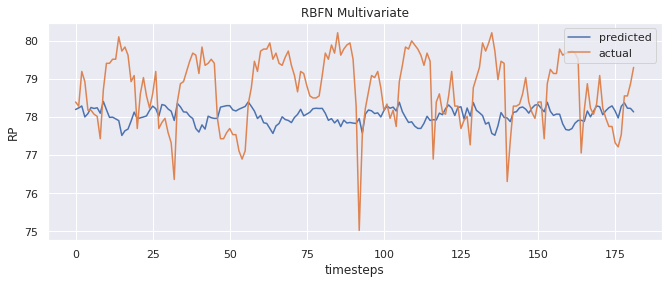

In [98]:
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('RBFN Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# LSTM

## Univariate

In [99]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [100]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [101]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1200 samples, validate on 182 samples
Epoch 1/20
 - 1s - loss: 0.3629 - mean_absolute_error: 0.5862 - val_loss: 0.3580 - val_mean_absolute_error: 0.5878
Epoch 2/20
 - 0s - loss: 0.2147 - mean_absolute_error: 0.4457 - val_loss: 0.1990 - val_mean_absolute_error: 0.4342
Epoch 3/20
 - 0s - loss: 0.1012 - mean_absolute_error: 0.2983 - val_loss: 0.0833 - val_mean_absolute_error: 0.2746
Epoch 4/20
 - 0s - loss: 0.0345 - mean_absolute_error: 0.1633 - val_loss: 0.0248 - val_mean_absolute_error: 0.1402
Epoch 5/20
 - 0s - loss: 0.0132 - mean_absolute_error: 0.0938 - val_loss: 0.0102 - val_mean_absolute_error: 0.0835
Epoch 6/20
 - 0s - loss: 0.0130 - mean_absolute_error: 0.0875 - val_loss: 0.0090 - val_mean_absolute_error: 0.0766
Epoch 7/20
 - 0s - loss: 0.0132 - mean_absolute_error: 0.0878 - val_loss: 0.0095 - val_mean_absolute_error: 0.0795
Epoch 8/20
 - 0s - loss: 0.0129 - mean_absolute_error: 0.0875 - val_loss: 0.0097 - val_mean_absolute_error: 0.0806
Epoch 9/20
 - 0s - loss: 0.0128 -

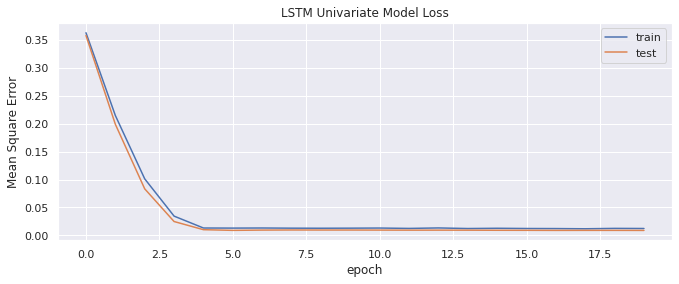

In [102]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Univariate Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

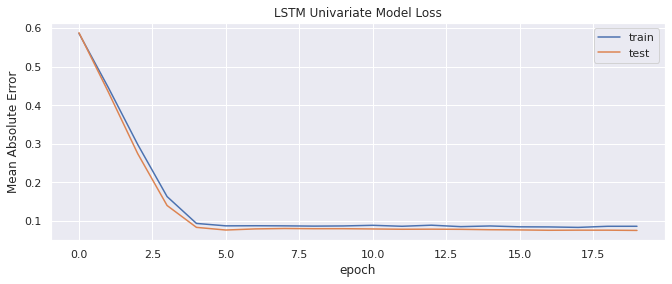

In [103]:
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('LSTM Univariate Model Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [104]:
predictions = model.predict(test_X)
LSTM_univariate_mae = mean_absolute_error(test_y, predictions)
LSTM_univariate_mse = mean_squared_error(test_y, predictions)

In [105]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'LSTM_univariate'
loss_all_model.loc[model_index, 'MAE'] = LSTM_univariate_mae
loss_all_model.loc[model_index, 'MSE'] = LSTM_univariate_mse
model_index += 1

In [106]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
lstm_mae_lstm_univariate = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.5f' % lstm_mae_lstm_univariate)

Test MAE: 0.56730


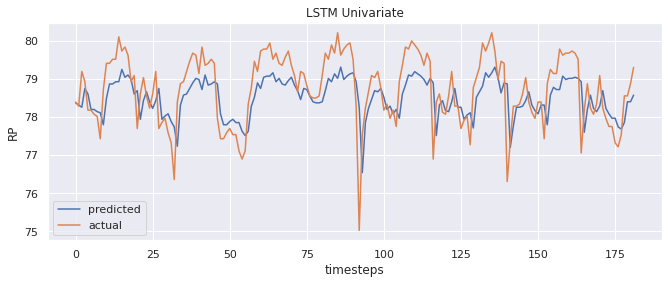

In [107]:
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('LSTM Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

## Multivariate

In [108]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [109]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [110]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 1200 samples, validate on 182 samples
Epoch 1/20
 - 1s - loss: 0.3149 - mean_absolute_error: 0.5466 - val_loss: 0.2762 - val_mean_absolute_error: 0.5164
Epoch 2/20
 - 0s - loss: 0.1400 - mean_absolute_error: 0.3590 - val_loss: 0.1030 - val_mean_absolute_error: 0.3114
Epoch 3/20
 - 0s - loss: 0.0381 - mean_absolute_error: 0.1768 - val_loss: 0.0211 - val_mean_absolute_error: 0.1318
Epoch 4/20
 - 0s - loss: 0.0105 - mean_absolute_error: 0.0818 - val_loss: 0.0064 - val_mean_absolute_error: 0.0606
Epoch 5/20
 - 0s - loss: 0.0122 - mean_absolute_error: 0.0854 - val_loss: 0.0062 - val_mean_absolute_error: 0.0598
Epoch 6/20
 - 0s - loss: 0.0118 - mean_absolute_error: 0.0858 - val_loss: 0.0071 - val_mean_absolute_error: 0.0649
Epoch 7/20
 - 0s - loss: 0.0114 - mean_absolute_error: 0.0840 - val_loss: 0.0073 - val_mean_absolute_error: 0.0663
Epoch 8/20
 - 0s - loss: 0.0115 - mean_absolute_error: 0.0847 - val_loss: 0.0071 - val_mean_absolute_error: 0.0649
Epoch 9/20
 - 0s - loss: 0.0118 -

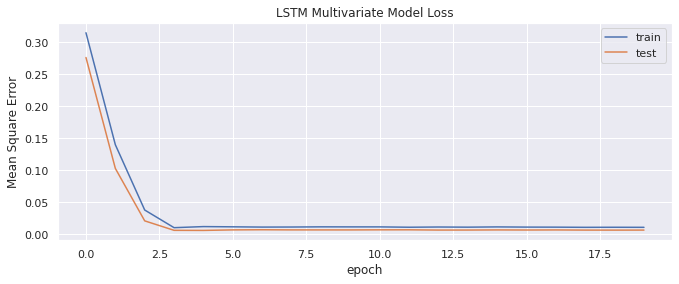

In [111]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Multivariate Model Loss')
plt.ylabel('Mean Square Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

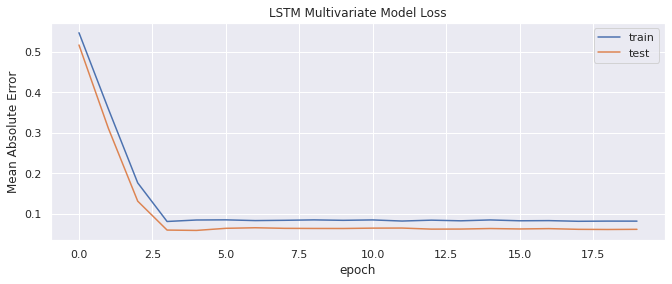

In [112]:
# summarize history for loss
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('LSTM Multivariate Model Loss')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [113]:
predictions = model.predict(test_X)
LSTM_multivariate_mae = mean_absolute_error(test_y, predictions)
LSTM_multivariate_mse = mean_squared_error(test_y, predictions)

In [114]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'LSTM_multivariate'
loss_all_model.loc[model_index, 'MAE'] = LSTM_multivariate_mae
loss_all_model.loc[model_index, 'MSE'] = LSTM_multivariate_mse
model_index += 1

In [115]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE



In [116]:
mae_LSTM_multivariate = mean_absolute_error(inv_y, inv_yhat)
print('Test MAE: %.5f' % mae_LSTM_multivariate)

Test MAE: 0.46831


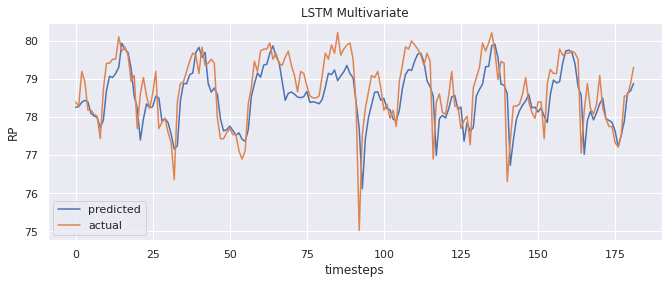

In [117]:
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('LSTM Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

# ARIMA

# Univariate

In [118]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [119]:
# Define the p, d and q parameters to take any value between 0 and 2
p=d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [120]:
# parameters ARIMA(1, 0, 0)x(1, 1, 1, 12)
mod = sm.tsa.statespace.SARIMAX(nov_apr_resample['RP'],
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7411      0.017     42.711      0.000       0.707       0.775
ar.S.L12      -0.1775      0.023     -7.863      0.000      -0.222      -0.133
ma.S.L12      -0.9628      0.008   -128.377      0.000      -0.978      -0.948
sigma2         1.2032      0.030     39.708      0.000       1.144       1.263


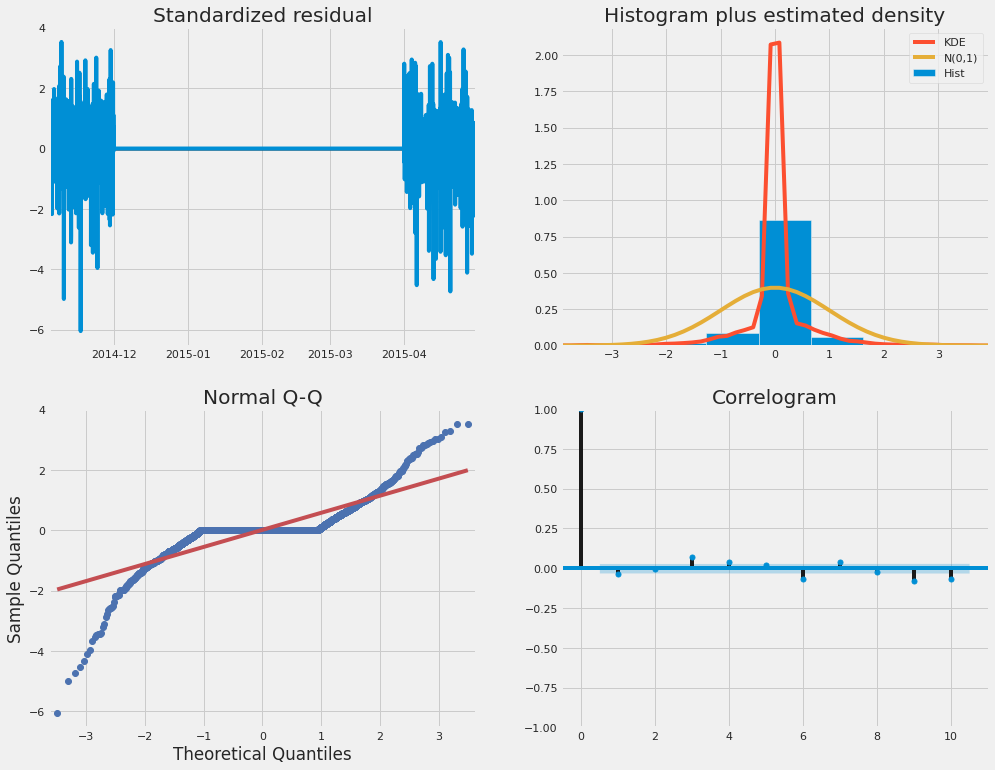

In [121]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [122]:
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

In [123]:
nov_apr_resample['RP']

time_corrected
2014-11-03 00:00:00    89.9
2014-11-03 01:00:00    89.9
2014-11-03 02:00:00    89.7
2014-11-03 03:00:00    88.5
2014-11-03 04:00:00    89.3
2014-11-03 05:00:00    87.5
2014-11-03 06:00:00    80.6
2014-11-03 07:00:00    83.8
2014-11-03 08:00:00    86.6
2014-11-03 09:00:00    87.7
2014-11-03 10:00:00    88.8
2014-11-03 11:00:00    88.9
2014-11-03 12:00:00    89.1
2014-11-03 13:00:00    87.6
2014-11-03 14:00:00    87.5
2014-11-03 15:00:00    86.6
2014-11-03 16:00:00    86.1
2014-11-03 17:00:00    85.6
2014-11-03 18:00:00    85.7
2014-11-03 19:00:00    88.3
2014-11-03 20:00:00    88.5
2014-11-03 21:00:00    89.9
2014-11-03 22:00:00    89.2
2014-11-03 23:00:00     NaN
2014-11-04 00:00:00    90.3
2014-11-04 01:00:00    90.7
2014-11-04 02:00:00    89.4
2014-11-04 03:00:00    90.2
2014-11-04 04:00:00    88.8
2014-11-04 05:00:00    90.0
                       ... 
2015-04-29 18:00:00    87.6
2015-04-29 19:00:00    90.3
2015-04-29 20:00:00    91.0
2015-04-29 21:00:00    90.8
2015-

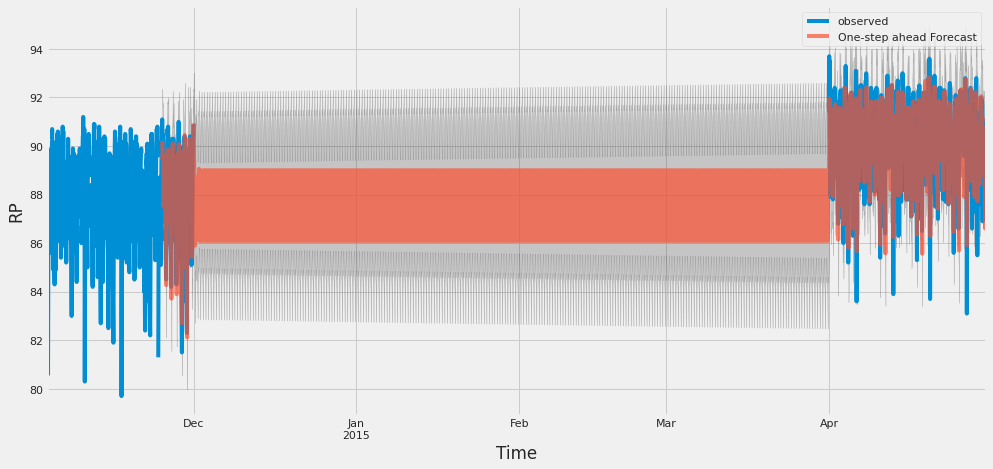

In [124]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
ax = nov_apr_resample['RP'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('RP')
plt.legend()

plt.show()

In [125]:
y_uniforecasted = pred.predicted_mean
y_unitruth = nov_apr_resample['RP']['2014-11-25':]

In [126]:
ARIMA_univariate_mae = (abs(y_unitruth - y_uniforecasted)).mean()
ARIMA_univariate_mse = (abs(y_unitruth - y_uniforecasted)**2).mean()

In [127]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'ARIMA_univariate'
loss_all_model.loc[model_index, 'MAE'] = ARIMA_univariate_mae
loss_all_model.loc[model_index, 'MSE'] = ARIMA_univariate_mse
model_index += 1

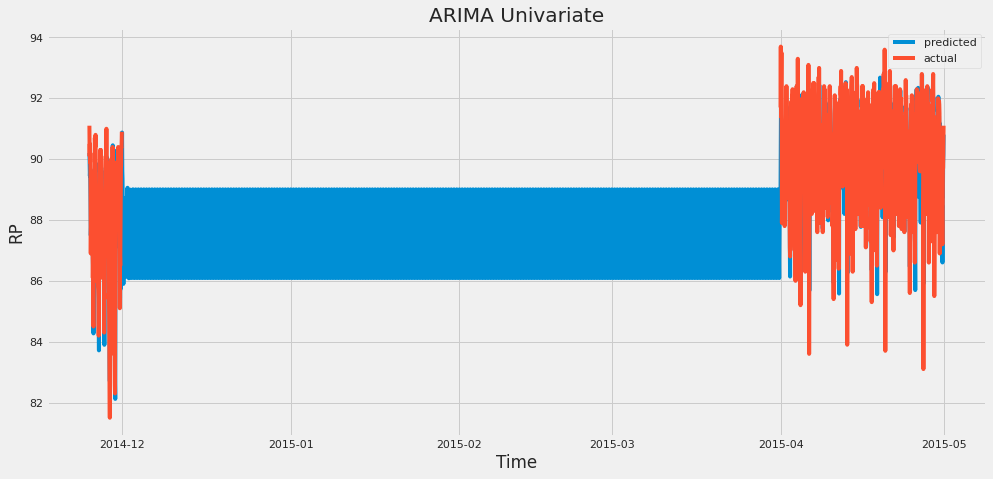

In [128]:
plt.plot(y_uniforecasted)
plt.plot(y_unitruth)
plt.title('ARIMA Univariate')
plt.ylabel('RP')
plt.xlabel('Time')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# Multivariate


In [129]:
train =nov_apr_resample.loc[:,'RP']
exog = nov_apr_resample.loc[:,'traffic information']

In [130]:
exog = exog.replace([np.inf, -np.inf], np.nan).fillna(0) 

In [131]:
mod = sm.tsa.statespace.SARIMAX(train, exog=exog.astype('float64'), trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary().tables[1])

                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
traffic information     0.5751      0.041     14.096      0.000       0.495       0.655
ar.S.L12               -0.0460      0.027     -1.719      0.086      -0.098       0.006
ma.S.L12               -0.9885      0.005   -217.310      0.000      -0.997      -0.980
sigma2                  1.2700      0.030     42.029      0.000       1.211       1.329


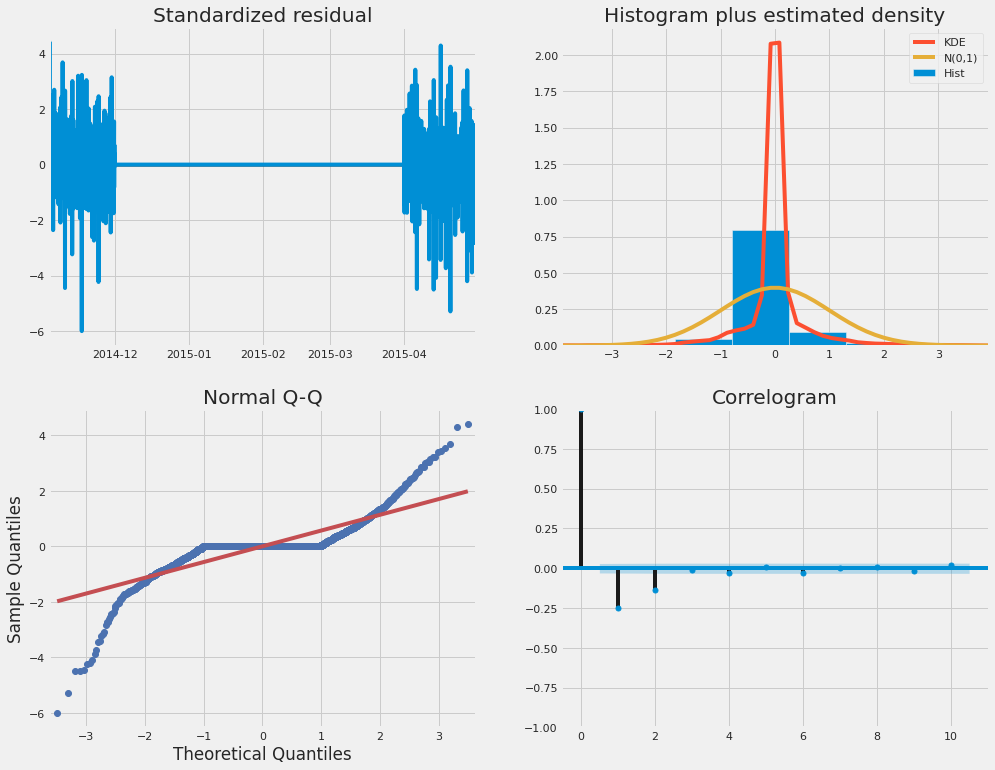

In [132]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [133]:
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

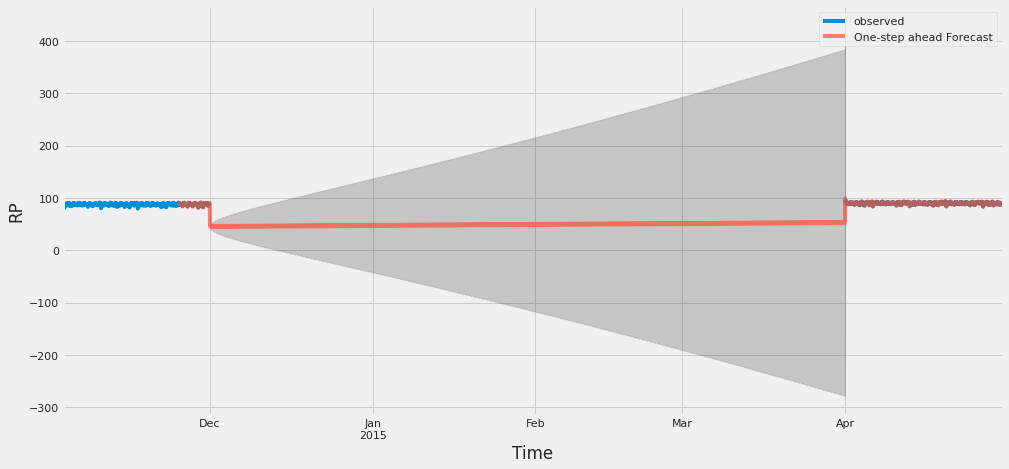

In [134]:
from pylab import rcParams
ax = nov_apr_resample['RP'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('RP')
plt.legend()

plt.show()

In [135]:
exog_forecast = nov_apr_resample.loc['2014-11-25':,'traffic information']
exog_forecast = exog_forecast.replace([np.inf, -np.inf], np.nan).fillna(0) 
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'),exog=exog_forecast, dynamic=False)

In [136]:
y_multiforecasted = pred.predicted_mean
y_multitruth = nov_apr_resample['RP']['2014-11-25':]

In [137]:
ARIMA_multivariate_mae = (abs(y_multitruth - y_multiforecasted)).mean()
ARIMA_multivariate_mse = (abs(y_multitruth - y_multiforecasted)**2).mean()

In [138]:
# storing current model loss values
loss_all_model.loc[model_index, 'model'] = 'ARIMA_multivariate'
loss_all_model.loc[model_index, 'MAE'] = ARIMA_multivariate_mae
loss_all_model.loc[model_index, 'MSE'] = ARIMA_multivariate_mse
model_index += 1

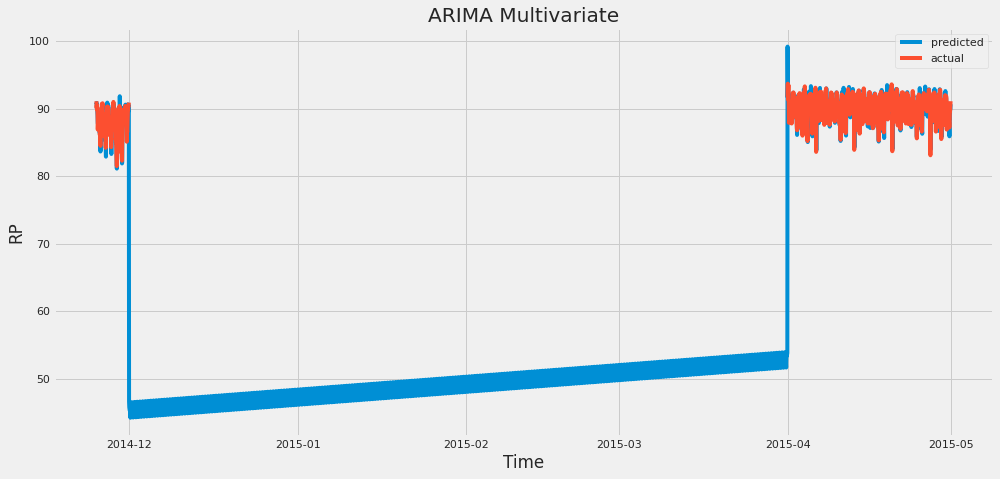

In [139]:
plt.plot(y_multiforecasted)
plt.plot(y_multitruth)
plt.title('ARIMA Multivariate')
plt.ylabel('RP')
plt.xlabel('Time')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

In [140]:
df_uni = pd.DataFrame(columns=['time','predicted','true'])
df_multi = pd.DataFrame(columns=['time','predicted','true'])

In [141]:
df_uni['time'] = y_uniforecasted.index
df_uni['predicted'] = y_uniforecasted.values
df_uni['true'] = y_unitruth.values

df_multi['time'] = y_multiforecasted.index
df_multi['predicted'] = y_multiforecasted.values
df_multi['true'] = y_multitruth.values

In [142]:
df_uni.dropna(inplace=True)
df_uni.reset_index(drop=True, inplace=True)

df_multi.dropna(inplace=True)
df_multi.reset_index(drop=True, inplace=True)

In [155]:
print(df_uni['predicted'].min())
print(df_uni['predicted'].max())
print(df_multi['predicted'].min())
print(df_multi['predicted'].max())

82.11880204614307

In [172]:
df_uni = df_uni[(df_uni.loc[:,'predicted'] >= 82) & (df_uni.loc[:, 'predicted'] <= 92)]

In [182]:
df_uni = df_uni[(df_uni.loc[:,'true'] >= 82) & (df_uni.loc[:, 'true'] <= 92)]

In [173]:
df_multi = df_multi[(df_multi.loc[:,'predicted'] >= 82) & (df_multi.loc[:, 'predicted'] <= 92)]

In [183]:
df_multi = df_multi[(df_multi.loc[:,'true'] >= 82) & (df_multi.loc[:, 'true'] <= 92)]

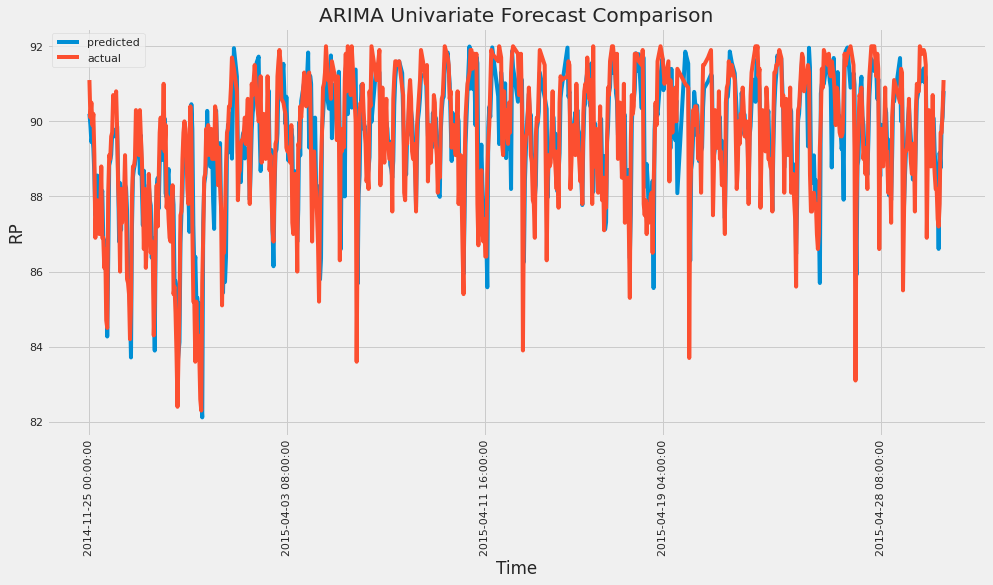

In [186]:
plt.plot(df_uni['predicted'])
plt.plot(df_uni['true'])
plt.title('ARIMA Univariate Forecast Comparison')
plt.ylabel('RP')
plt.xlabel('Time')
plt.xticks([0,200,400,580,800], [date for date in df_uni.loc[[0,200,400,580,800],'time']],
           rotation=90)
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

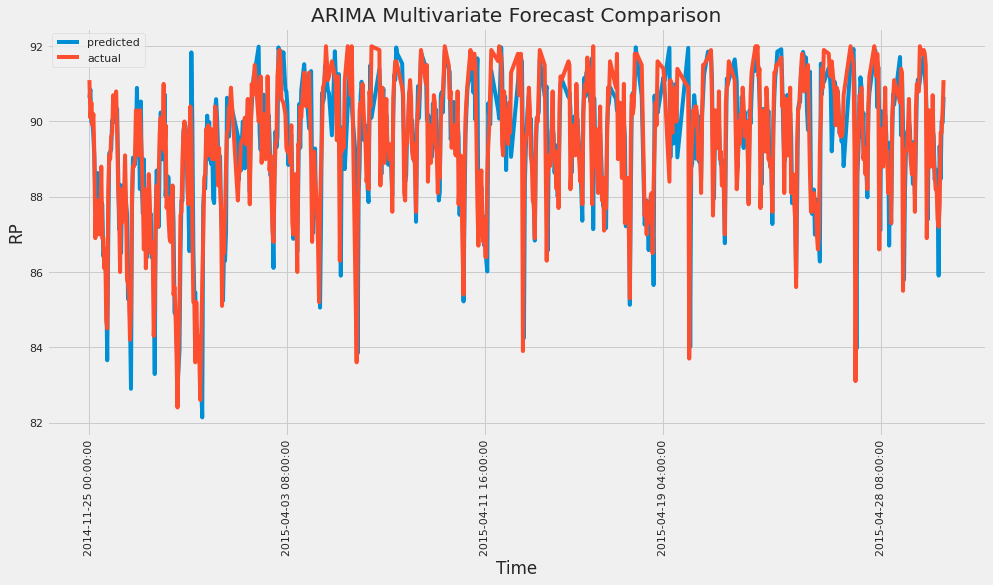

In [187]:
plt.plot(df_multi['predicted'])
plt.plot(df_multi['true'])
plt.title('ARIMA Multivariate Forecast Comparison')
plt.ylabel('RP')
plt.xlabel('Time')
plt.xticks([0,200,400,580,800], [date for date in df_multi.loc[[0,200,400,580,800],'time']],
           rotation=90)
plt.legend(['predicted', 'actual'], loc='best')
plt.show()

In [145]:
loss_all_model

,model,MSE,MAE
0,svm_nov_apr_uni,4.22101,1.5595
1,svm_nov_apr_multi,4.87618,1.6453
2,DNN_univariate,2.32731,1.21627
3,DNN_multivariate,1.98841,1.07208
4,GRU_univariate,0.0131529,0.097329
5,GRU_multivariate,0.00858498,0.0743621
6,RBFN_univariate,0.0253226,0.132392
7,RBFN_multivariate,0.0266647,0.133461
8,LSTM_univariate,0.00888392,0.0756401
9,LSTM_multivariate,0.00675245,0.0624412


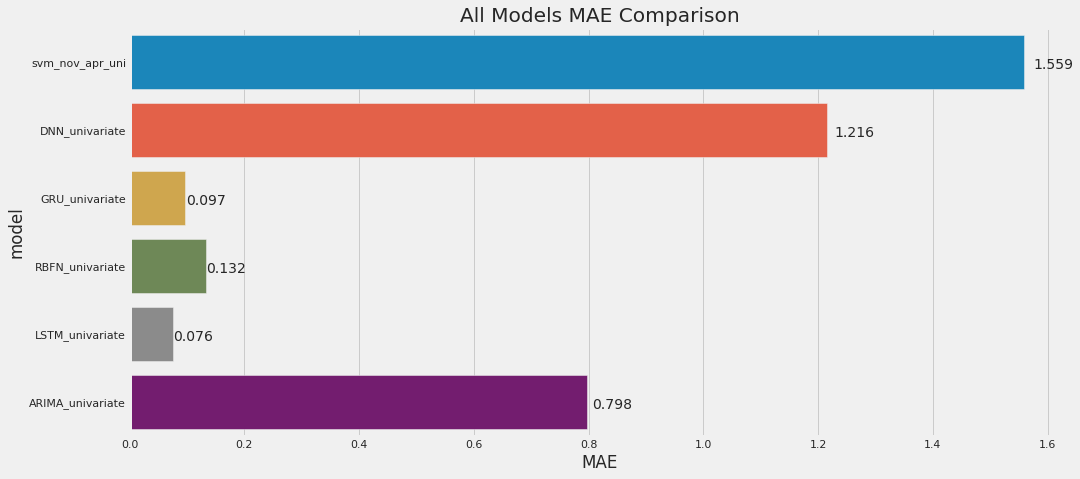

In [146]:
g = sns.barplot(loss_all_model.loc[[0,2,4,6,8,10],'MAE'], loss_all_model.loc[[0,2,4,6,8,10],'model'])
for i, v in enumerate(loss_all_model.loc[[0,2,4,6,8,10],'MAE']):
    g.text(v*1.01, i+0.1, str(round(v,3)))
plt.title('All Univariate Models MAE Comparison')
plt.show()

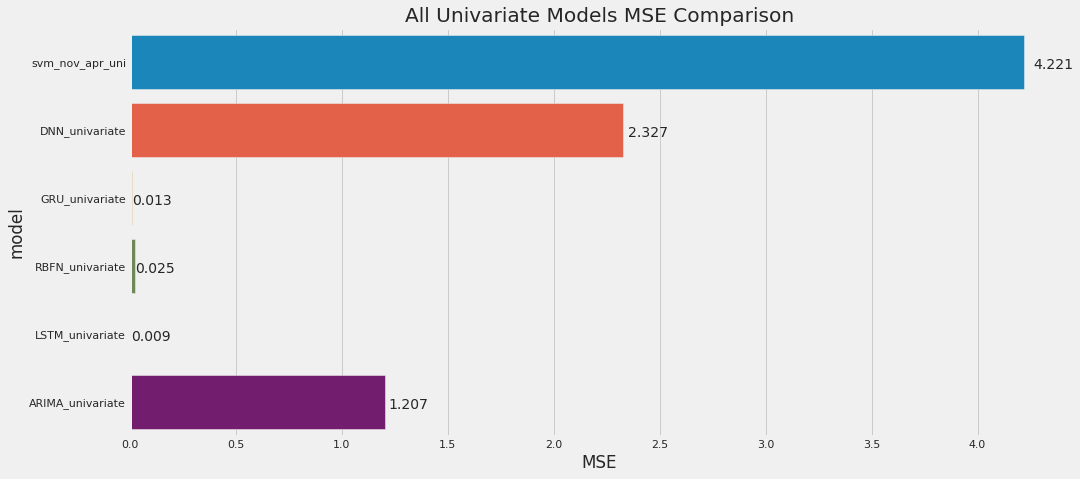

In [149]:
g = sns.barplot(loss_all_model.loc[[0,2,4,6,8,10],'MSE'], loss_all_model.loc[[0,2,4,6,8,10],'model'])
for i, v in enumerate(loss_all_model.loc[[0,2,4,6,8,10],'MSE']):
    g.text(v*1.01, i+0.1, str(round(v,3)))
plt.title('All Univariate Models MSE Comparison')
plt.show()

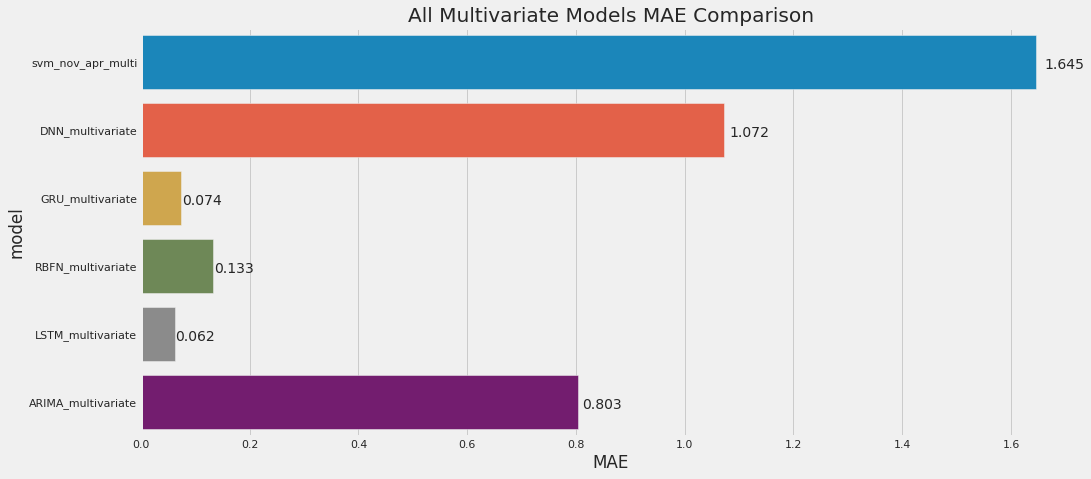

In [151]:
g = sns.barplot(loss_all_model.loc[[1,3,5,7,9,11],'MAE'], loss_all_model.loc[[1,3,5,7,9,11],'model'])
for i, v in enumerate(loss_all_model.loc[[1,3,5,7,9,11],'MAE']):
    g.text(v*1.01, i+0.1, str(round(v,3)))
plt.title('All Multivariate Models MAE Comparison')
plt.show()

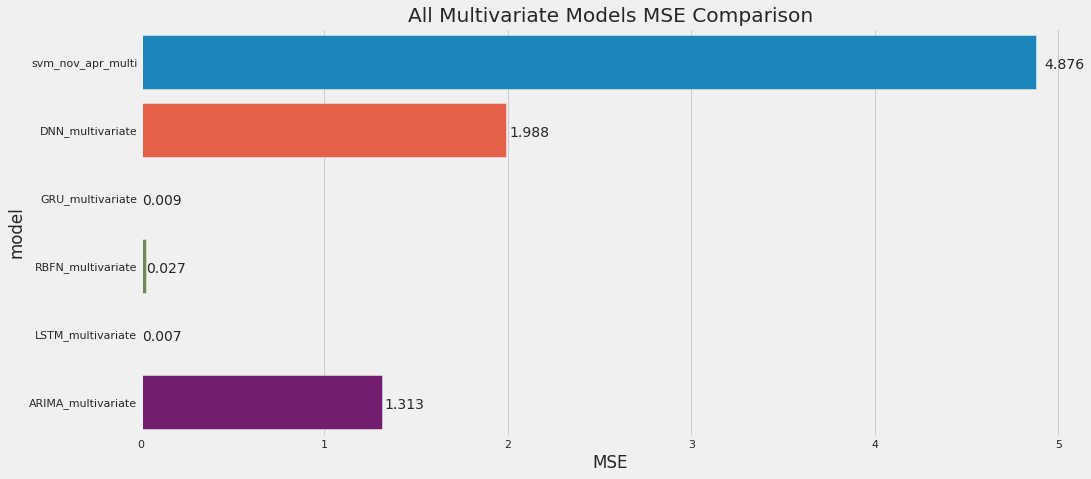

In [152]:
g = sns.barplot(loss_all_model.loc[[1,3,5,7,9,11],'MSE'], loss_all_model.loc[[1,3,5,7,9,11],'model'])
for i, v in enumerate(loss_all_model.loc[[1,3,5,7,9,11],'MSE']):
    g.text(v*1.01, i+0.1, str(round(v,3)))
plt.title('All Multivariate Models MSE Comparison')
plt.show()